Notes (starting) from "Deep Learning with Python" by F. Chollet
----------------------------------------------------

Nathan A. Mahynski

See the [keras](https://keras.io) documentation for a lot of different [examples](https://keras.io/examples) and "cookbook" recipes. This is code from F. Chollet's book above, adapted at the time of writing (2022) to be compatible with the current Keras API.

This is a bit dated - there is a new Keras functionality called [model subclassing](https://pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/) which gives you another way to make complex models.

In [ ]:
using_colab = 'google.colab' in str(get_ipython())
if using_colab:
  from google.colab import drive
  drive.mount('/gdrive')
  root_dir = '/gdrive/MyDrive/Mayan EDMS/Research/Machine Learning/Colab Notebook Examples/deep_learning'
else:
  !pip install keras==2.8.0 # Version notes were taken at
  import os
  root_dir = os.getcwd()

import keras
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

import shutil, os

Mounted at /gdrive


In [ ]:
!pip install watermark

In [ ]:
import watermark
%load_ext watermark

%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.188+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 1.21.6
matplotlib: 3.2.2
tensorflow: 2.8.2+zzzcolab20220527125636
IPython   : 5.5.0
watermark : 2.3.1
keras     : 2.8.0
google    : 2.0.3



Notes


---


"Uncrumpling paper balls is what machine learning is about: finding neat representations for complex, highly folded data manifolds."

See [Keras documentation](https://keras.io/) for updated documentation, tutorials, etc.

In [ ]:
def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values)+1)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

  axes[0].plot(epochs, loss_values, 'bo', label='Training Loss')
  axes[0].plot(epochs, val_loss_values, 'b', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend(loc='best')

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  axes[1].plot(epochs, acc, 'bo', label='Training Acc.')
  axes[1].plot(epochs, val_acc, 'b', label='Validation Acc.')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend(loc='best')

# Chapters 1 & 2: Introduction

Notes

---

A NN is basically an input data, a series of layers (of varying topology which defines the hypothesis space), a loss function, and an optimizer.

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Re-shape input
train_images = train_images.reshape((60000, 28*28)).astype('float32') / 255.
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255.

# OneHot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Create a simple, fully connected NN model
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Fit using mini-batch stochastic gradient descent (SGD)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# For 60,000 samples at 128 random samples per mini-batch, we have 469
# mini-batches per epoch.

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1023 - accuracy: 0.9697
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9887
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0283 - accuracy: 0.9916


In [ ]:
# Evaluate
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9800


In [ ]:
print('Test loss = {}, Test accuracy = {}%'.format(test_loss, '%.2f'%(100*test_acc)))

Test loss = 0.06377651542425156, Test accuracy = 98.00%


# Chapter 3: Getting Started with Neural Networks



Guidelines:


---


* [Binary classification] -> binary crossentropy loss; always with a final Dense layer of size 1 to output a scalar probability (sigmoid activation).
* [Multiclass, single label classification] -> categorical categorical_crossentropy loss for OHE responses; last layer should be Dense with size = num_category using softmax activation to give probabalities of each class which sum to 1.  Also avoid internal bottlenecks (layer sizes) that are less than num_category. Use OneHot encoding of your responses (y values).
* [Multi-label classification] -> same as last one, except uses binary_crossentropy since each label gets a yes/no and is distinct from each other.
* [Regression] -> mean squared error as loss; last layer is just a Dense node of size 1 that pools the results to produce a floating point number for scalar regression.  You should generally autoscale your features when they have different "scales" (units).
* Sequence learning problems -> connectionist temporal classification (CTC)



Notes:


---


* Crossentropy measures the distance between probability distributions.
* Use KFold when you don't have "much" data.
* Start small with 1-2 layers to avoid severe overfitting at first.

> "**Multilabel**" classification problem = each sample can have multiple labels ("cat" and "dog" can both in the image, e.g.)

> "**Multiclass classification**" = case where there are more than 2 possible classes to be assigned to (e.g., the MNIST digits has 10 categories).
"Scalar regression" = output of model is a single floating point number.
"Vector regression" = model outputs a number of floating point numbers.

## Binary classification example

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# OneHot encode the data (which is a sequence of integers denoting word indices
# from a fixed library).  scikit-learn can also do this easily.
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# 2 layer model with a final layer to predict a "probability" with a sigmoid
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # Always end with 1 layer for probability (scalar)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Set aside a validation set to monitor the progress of the training. This can
# be used for early stopping of the training process.
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

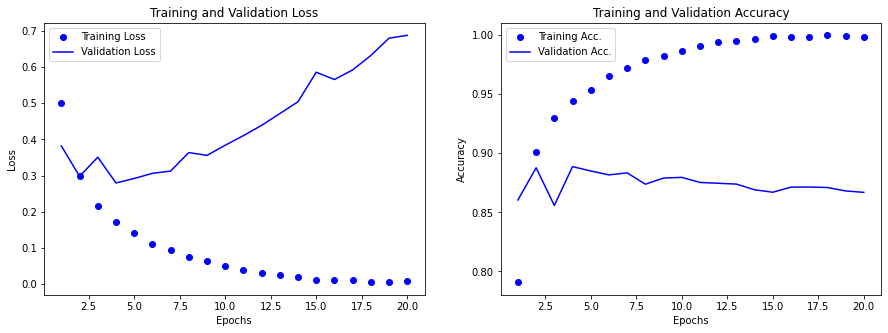

In [ ]:
plot_history(history)

You can imagine creating a simple wrapper that creates a model to take in hyperparameters like num_layers, and layer_size which could be put into a scikit-learn pipeline and optimized with GridSearch, for example.  I am sure that other optimization (e.g., AutoML) could also be used.

## Multi-class classification example

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
np.unique(train_labels) # We now have 46 categories instead of 2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
# This is the same as to_categorical() function
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 2 layer model with a final layer to predict a "probability" with a sigmoid
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # Always end with num_categories for probability (which will sum to 1)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Set aside a validation set to monitor the progress of the training. This can
# be used for early stopping of the training process.
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

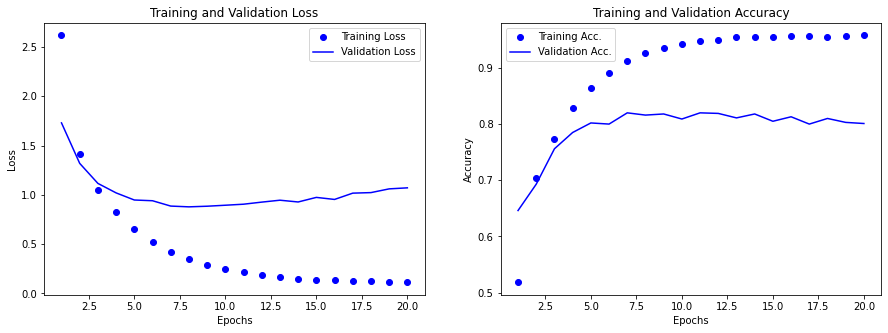

In [ ]:
plot_history(history)

## Regression example

In [ ]:
from keras.datasets import boston_housing

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_data = ss.fit_transform(train_data)
test_data = ss.transform(test_data)

In [ ]:
def build_model():
  model= models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

all_mae_histories = []
num_epochs = 300

for train_index, val_index in kf.split(train_data):
  x_train, x_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]
  model = build_model()
  history = model.fit(x_train, y_train, epochs=num_epochs,
                      batch_size=1, verbose=0,
                      validation_data=(x_val, y_val)
                      )
  all_mae_histories.append(history.history['val_mae'])

(0.0, 5.0)

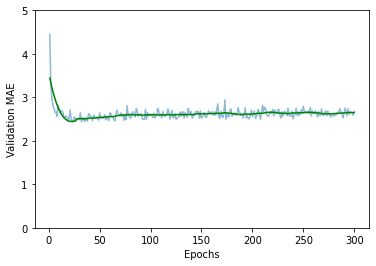

In [ ]:
# Smooth out the results for better visualization
from scipy.signal import savgol_filter

avg_mae_hist = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

x = range(1, len(avg_mae_hist)+1)
yhat = savgol_filter(avg_mae_hist, 51, 3)

plt.plot(x, avg_mae_hist, alpha=0.5)
plt.plot(x, yhat, color='green')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

plt.ylim(0, 5)

In [ ]:
# Re-train on the entire dataset
model = build_model()
model.fit(x_train, y_train, epochs=25, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_targets, verbose=0)

In [ ]:
test_mae

3.436131238937378

# Chapter 4: Fundamentals of Machine Learning

Notes

---

"Data Vectorization" = turning inputs into floating point values.  All NN
require floating point information as an input.


Regularization tools for NN:
1. Reducing the network's size; number of learnable parameters = "capacity" which should be so large the NN can simply memorize the training data.
2. Weight regularization; L1/L2 as in ML can be applied. L2 is sometimes called "weight decay" in the NN community.  Keras can apply regularization to the kernel (weights) and/or the bias (constant factor added) inputs to a layer, and also to the output ("activity").  Typically, kernel_regularizer is the way to go.
```python
from keras import regularizers
model.add(layers.Dense(
    64,
    activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.005)
    )
)
model.summary() # Will display the number of trainable parameters
```
3. Dropout; most common and most effective.  This "drops out" (zeros out) some randomly chosen output features from a layer during training.  At test time no dropout is performed; instead the output values are scaled down by a factor equal to the dropout rate to account for the fact that more units are active now.
```python
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(100,))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
```


# Chapter 5: Deep Learning for Computer Vision (CNN)

Notes

---

* [Stanford CS230 CNN cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) is a nice visual summary of CNNs and their parameters.


* Dense layers learn **global** patterns by looking at vectors of data
* Conv layers learn **local** patterns

* Convnets learn translation invariant patterns; the same local pattern can appear somwhere else in the image and if it is the same, the response from the NN will be the same. Thus, they need less examples to train because they "re-use" this information.
* Convnets learn spatial hierarchies of patterns

* Convolution layers use a filter (e.g., 3x3) and output the **response map** (similarity) of the filter over the input (image).  So if a filter has a specific local pattern and the local set of points in the input image being examined "look like" that filter, the response map at that location will be high.

* Convolutions are determined by (1) the filter size (e.g., 3x3 or 5x5) and (2) depth of the reponse map (i.e., the number of filters).

* Padding needs to be added to use the border of images.  ```padding=valid```  excludes the boundary region to only use valid pixels, whereas ```padding=same``` will create a padding to put the edges at the center of a filter.

[![](http://img.youtube.com/vi/KuXjwB4LzSA/0.jpg)](https://www.youtube.com/watch?v=KuXjwB4LzSA&list=WL&index=4)

Downsampling

---


* Strides (defaults to 1) will determined how far you "walk" before performing another convolution.  This effectively downsamples the image.  ~~These are rarely used in practice.~~ Actually, stride 2 or more seem to be the preferred way to downsample now and pooling is not recommended as much - in part because this breaks a CNN's translational invariance.

[![](https://img.youtube.com/vi/a4Quhf9NhMY/0.jpg)](https://www.youtube.com/watch?v=a4Quhf9NhMY&list=WL&index=8)

* ~~Max-pooling is the preferred down-sampling method.~~  MP takes the maximum value over its domain and returns it instead of performing a kernel operation on the input patch.  Typically this is done with 2x2 windows to downsample the feature map by a factor of 2.

* Downsampling helps move information from far apart closer together in between Conv layers; this helps the NN learn things more hierarchically.

* Because of downsampling most convnets typically decrease the size of the feature map while increasing their depth. With many convnets the number of filters is increased (say doubled) when downsampling (by half) to preserve information through the network. (see [Deep learning for coders with fastai and pytorch](https://course.fast.ai/Lessons/lesson8.html))

* The first layer can have large filters (e.g., 5x5) and longer strides, but typically it is better to stack muliple layers with smaller filters (e.g., two layers with 3x3 filters instead of 1 with 5x5) - this has fewer parameters and generally they perform better. See [Hands on machine learning with scikit-learn, keras, and tensorflow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646).

Pre-trained Networks

---


Because CNNs learn a spatial hierarchy of features, if you have a pre-trained network that was trained on a large and general enough set, you can repurpose it via [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning).  This exploits the generic models of lines, shapes, etc. already learned but now correlates them with some other labels using a different "top" when the convolution base is fixed.


In [ ]:
base_dir = root_dir+'/kaggle_dogs_vs_cats/train_small/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras.optimizers import rmsprop_v2
from keras.preprocessing.image import ImageDataGenerator

## Compare to dense NN

In [ ]:
# Let's classify MNIST digits (28 x 28 image of pixels)
model = models.Sequential()
model.add(layers.Conv2D(
    32, # 32 "filters"
    (3, 3),
    activation='relu',
    input_shape=(28, 28, 1),
    padding='valid')
)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(
    64, # 64 "filters"
    (3, 3),
    activation='relu'),
    padding='valid')
)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(
    64, # 64 "filters"
    (3, 3),
    activation='relu'),
    padding='valid')
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-tra

In [ ]:
model.add(layers.Flatten()) # Flatten out to a vector to be sent to dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 categories, predict probability of each

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)             

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Re-shape input
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.

# OneHot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1644 - accuracy: 0.9488
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0460 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0190 - accuracy: 0.9941


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9900
0.9900000095367432


## The "small" data limit

What if we only have 100s - 1000s of images?  We can still train convnets.

In [ ]:
# original_dataset_dir = root_dir+'/kaggle_dogs_vs_cats/train_full/'
# os.mkdir(base_dir)

# os.mkdir(train_dir)
# os.mkdir(validation_dir)
# os.mkdir(test_dir)

# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
model = models.Sequential()

# Convolution "base"
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

# Dense "top"
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=rmsprop_v2.RMSprop(learning_rate=1.0e-4),
              metrics=['accuracy']
              )

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Target of 150 x 150 pixels
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), # Target of 150 x 150 pixels
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, # take 100 batches; each batch is 20 so this will look at 2000 samples total
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save(os.path.join(root_dir, 'cats_and_dogs_small_1.h5'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 29s 162ms/step - loss: 0.6863 - accuracy: 0.5535 - val_loss: 0.6703 - val_accuracy: 0.5940
Epoch 2/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6566 - accuracy: 0.6190 - val_loss: 0.6498 - val_accuracy: 0.6020
Epoch 3/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6098 - accuracy: 0.6750 - val_loss: 0.6334 - val_accuracy: 0.6350
Epoch 4/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5584 - accuracy: 0.7085 - val_loss: 0.5974 - val_accuracy: 0.6700
Epoch 5/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5320 - accuracy: 0.7360 - val_loss: 0.6186 - val_accuracy: 0.6680
Epoch 6/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5060 - accuracy: 0.7545 - val_loss: 0.5620 - val_accuracy: 0.6910
Epoch 7/30
100/100 [==============================] - 14s 141ms/step - loss: 0.4745 - accuracy: 0.7660 - val_loss: 0.5684 - val_ac

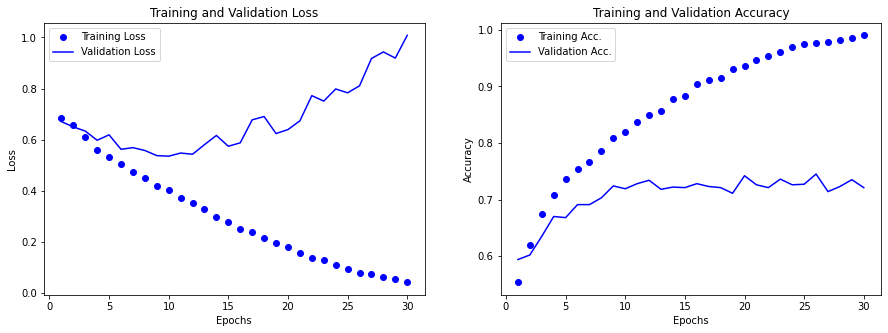

In [ ]:
plot_history(history)

"Data augmentation" is very similar to class balancing methods or other tools
that generate synthetic training data ([SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), VAE, etc.); in this case, training samples are taken and randomly modified, akin to how SMOTE creates synthetic data by random interpolating between known examples of a class.

However, in this case, the original data is just used to "seed" the data the model actually uses to train on.  In never sees the original data but random variations on it which are never repeated (so it never even sees the same image twice)!

Just as in SMOTE, the test (or validation in these examples) should **NOT** be modified!


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

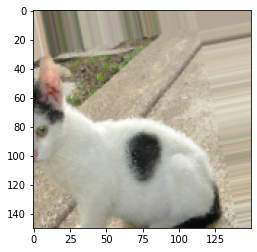

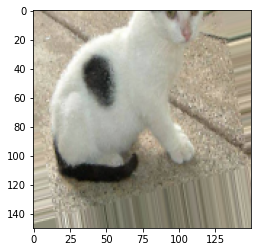

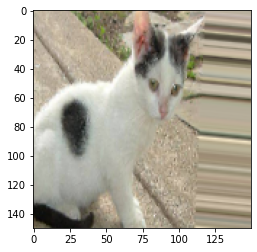

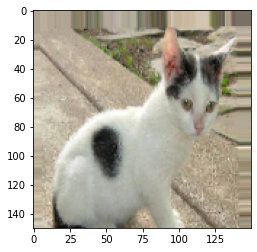

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

In [ ]:
model = models.Sequential()

# Convolution "base"
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

# Dense NN "backend"
model.add(layers.Dropout(0.5)) # Also add dropout layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=rmsprop_v2.RMSprop(learning_rate=1.0e-4),
              metrics=['accuracy']
              )

In [ ]:
# Training data will be modified
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# but NOT test/validation
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 16

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save(os.path.join(root_dir, 'cats_and_dogs_small_2.h5'))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 16s 163ms/step - loss: 0.5439 - accuracy: 0.7225 - val_loss: 0.5280 - val_accuracy: 0.7188
Epoch 2/100
100/100 [==============================] - 16s 156ms/step - loss: 0.5160 - accuracy: 0.7394 - val_loss: 0.4714 - val_accuracy: 0.7656
Epoch 3/100
100/100 [==============================] - 17s 167ms/step - loss: 0.5250 - accuracy: 0.7356 - val_loss: 0.5075 - val_accuracy: 0.7344
Epoch 4/100
100/100 [==============================] - 16s 158ms/step - loss: 0.5041 - accuracy: 0.7550 - val_loss: 0.5701 - val_accuracy: 0.7031
Epoch 5/100
100/100 [==============================] - 15s 148ms/step - loss: 0.5143 - accuracy: 0.7325 - val_loss: 0.6043 - val_accuracy: 0.7500
Epoch 6/100
100/100 [==============================] - 15s 150ms/step - loss: 0.5158 - accuracy: 0.7412 - val_loss: 0.4834 - val_accuracy: 0.8438
Epoch 7/100
100/100 [==============================] - 15s 149ms/step - loss: 0.5067 - accuracy: 0.7456 - val_loss: 0.7573 - val_accurac

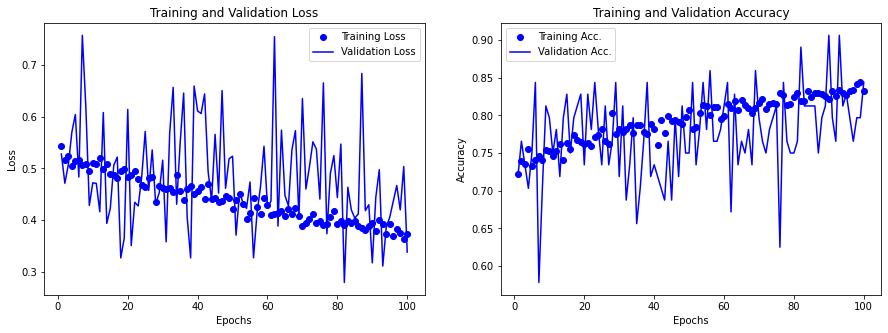

In [ ]:
plot_history(history)

## Feature extraction with a pre-trained network

In [ ]:
conv_base = tf.keras.applications.VGG16(
    weights='imagenet', # Pre-trained
    include_top=False, # Not going to use the dense "top", we are going to make our own
    input_shape=(150, 150, 3) # Optional, Keras will process any sized input
    )

conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

* Option 1: Simply call .predict() on the training data, save to disk, then use that to train a densely connected NN.  This is faster and can be done on a CPU.  However, it tends to overfit because we are not using data augmentation.


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count, batch_size=20):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count,))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size : (i + 1)*batch_size] = features_batch
    labels[i*batch_size : (i + 1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break

  return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Manually "flatten" the data for the dense NN that comes next
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=2.0e-5),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6385 - accuracy: 0.6410 - val_loss: 0.4538 - val_accuracy: 0.8270
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8080 - val_loss: 0.3639 - val_accuracy: 0.8580
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3619 - accuracy: 0.8390 - val_loss: 0.3268 - val_accuracy: 0.8770
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8670 - val_loss: 0.3111 - val_accuracy: 0.8730
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.8830 - val_loss: 0.2908 - val_accuracy: 0.8800
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.8900 - val_loss: 0.2786 - val_accuracy: 0.8830
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.9015 - val_loss: 0.2674 - val_accuracy: 0.8910
Epoch 

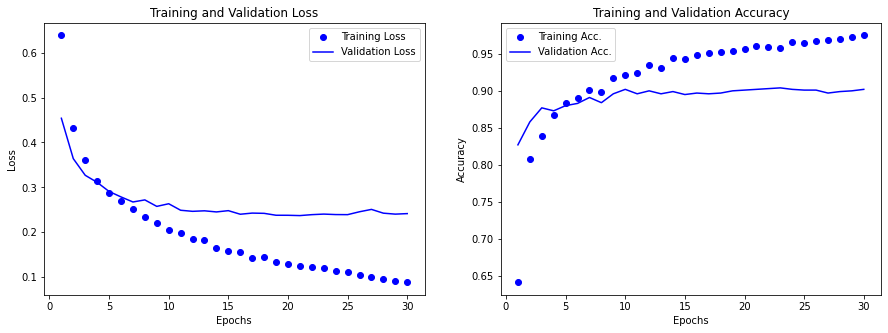

In [ ]:
plot_history(history) # Now we got validation accuracy to ~90% which is much better than training from scratch!

* Option 2: create a new composite model and use data augmentation ("random" dat generation) to train on.  This is MUCH MUCH more expensive and NEEDS a GPU; however, the performance is much better.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable=False # "Freeze" the base weights
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Training data will be modified
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# but NOT test/validation
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 20

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

NameError: ignored

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=2.0e-5),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 26s 252ms/step - loss: 1.5730 - accuracy: 0.6170 - val_loss: 0.8419 - val_accuracy: 0.7280
Epoch 2/100
100/100 [==============================] - 24s 238ms/step - loss: 1.1233 - accuracy: 0.7145 - val_loss: 0.6053 - val_accuracy: 0.7900
Epoch 3/100
100/100 [==============================] - 25s 252ms/step - loss: 0.8346 - accuracy: 0.7555 - val_loss: 0.6069 - val_accuracy: 0.8410
Epoch 4/100
100/100 [==============================] - 25s 252ms/step - loss: 0.7414 - accuracy: 0.7800 - val_loss: 1.1685 - val_accuracy: 0.7490
Epoch 5/100
100/100 [==============================] - 23s 234ms/step - loss: 0.8336 - accuracy: 0.7835 - val_loss: 0.5965 - val_accuracy: 0.8580
Epoch 6/100
100/100 [==============================] - 24s 238ms/step - loss: 0.7379 - accuracy: 0.7965 - val_loss: 0.5603 - val_accuracy: 0.8690
Epoch 7/100
100/100 [===================

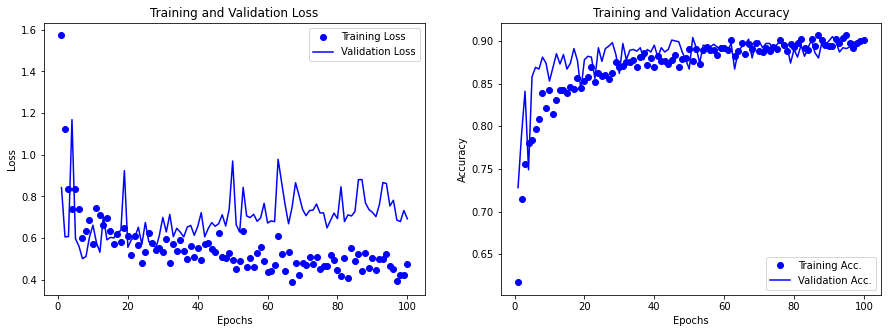

In [ ]:
plot_history(history)

## Fine-tuning a pre-trained network

"Fine tuning" consists of unfreezing just the top few layers of the base and training them along with the newly added dense top. This i typically done as follows:

1. Add custom top to frozen base
2. Freeze the base
3. Train the top part
4. Unfreeze some parts of the base
5. Re-train both the top and these unfrozen base parts.

By training the top with the base frozen first you get a good "start", then unfreezing keeps the system near where it started from, preserving the basic/abstract info while allowing it to optimize a bit more.

In [ ]:
conv_base = tf.keras.applications.VGG16(
    weights='imagenet', # Pre-trained
    include_top=False, # Not going to use the dense "top", we are going to make our own
    input_shape=(150, 150, 3) # Optional, Keras will process any sized input
    )

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Deactivate trainability for all layers before block5
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Training data will be modified
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# but NOT test/validation
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 20

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=1.0e-5), # Use low rate so model doesn't change quickly - we want to use the old info!
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 374s 4s/step - loss: 1.2852 - accuracy: 0.6420 - val_loss: 0.9788 - val_accuracy: 0.7690
Epoch 2/100
100/100 [==============================] - 25s 253ms/step - loss: 0.7134 - accuracy: 0.7425 - val_loss: 0.5428 - val_accuracy: 0.8570
Epoch 3/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6127 - accuracy: 0.8080 - val_loss: 0.4797 - val_accuracy: 0.8780
Epoch 4/100
100/100 [==============================] - 28s 276ms/step - loss: 0.5993 - accuracy: 0.8320 - val_loss: 0.3920 - val_accuracy: 0.8940
Epoch 5/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6693 - accuracy: 0.8490 - val_loss: 0.3799 - val_accuracy: 0.9030
Epoch 6/100
100/100 [==============================] - 26s 255ms/step - loss: 0.5392 - accuracy: 0.8660 - val_loss: 0.4877 - val_accuracy: 0.9000
Epoch 7/100
100/100 [=====================

In [ ]:
# model.save(os.path.join(root_dir, 'fine_tuned_vgg16.h5'))

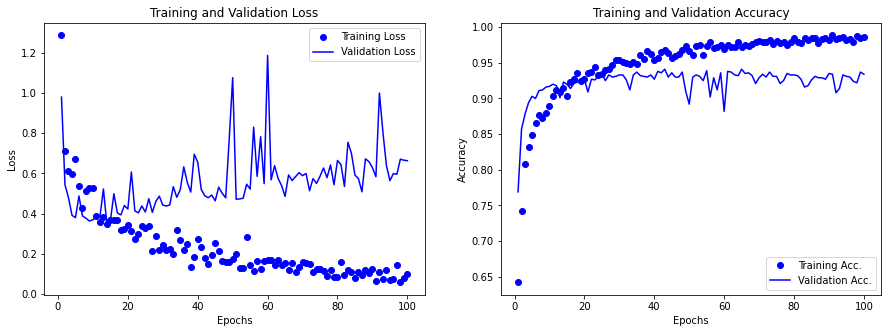

In [ ]:
plot_history(history)

In [ ]:
np.max(history.history['val_accuracy']) # Reached a max of 94% accuracy on validation set

0.9409999847412109

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy = {}'.format('%.2f'%(100*test_acc))) # Test performance about the same (good)

Test accuracy = 93.90


## Visualizing what convnets learn

### Method 1: Visualizing intermediate activations

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

model = load_model(os.path.join(root_dir, 'cats_and_dogs_small_2.h5'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
img_path = os.path.join(test_dir, 'cats/cat.1700.jpg') # Image NOT used in training
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


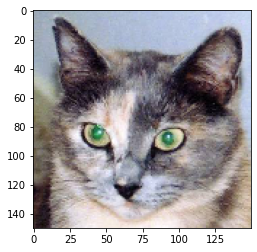

In [ ]:
plt.imshow(img_tensor[0])

In [ ]:
# Create a surrogate model that takes as input the model input, but as output returns the activation for each layer
layer_outputs = [layer.output for layer in model.layers[:8]] #[1:] - to exclude input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


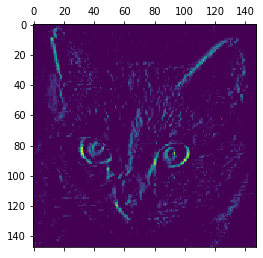

In [ ]:
channel = 4 # Let's just look at one of the output channels
plt.matshow(first_layer_activation[0, :, :, channel], cmap='viridis')

# This appears to be some sort of edge detector

In [ ]:
# Let's look at all the layers
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col*images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image

  scale = 1. / size
  plt.figure(
      figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]),
             )
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# Note how early filters act like edge detectors are more "specific" to the image.
# At later layers, the filters represent more abstract concepts (eye or ear, e.g.)
# Finally, the filters that are black did not trigger on the image (feature not present)

### Method 2: Visualizing convnet filters

In [ ]:
# We can perform gradient ascent to find the input that a filter maximally responds to

from keras import backend as K

model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False
)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1.0e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x, 0, 1)

  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  grads = K.gradients(loss, model.input)[0]
  grads /= K.sqrt(K.mean(K.square(grads)) + 1.0e-5) # A non-obvious normalization trick

  iterate = K.function([model.input], [loss, grads])
  loss_value, grads_value = iterate([np.zeros((1, size, size, 3))])

  input_img_data = np.random.random((1, size, size, 3))*20 + 128. # Start from gray, random image

  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value*step

  img = input_img_data[0]
  return deprocess_image(img)

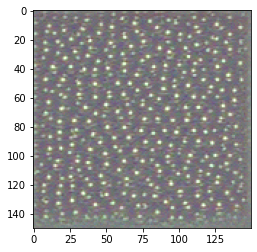

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0)) # Apparently, this filter responds to polka-dot patterns

In [ ]:
# Now let's look at the first 64 filters in each layer

def examine_filters(layer_name):
  size = 64
  margin = 5

  results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3), dtype='uint8')
  for i in range(8):
    for j in range(8):
      filter_img = generate_pattern(layer_name, i+(j*8), size=size)
      horizontal_start = i*size + i*margin
      horizontal_end = horizontal_start + size
      vertical_start = j*size + j*margin
      vertical_end = vertical_start + size
      results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img

  plt.figure(figsize=(20,20))
  plt.imshow(results)

In [ ]:
# Look at the first convolution block in the model
examine_filters('block1_conv1') # These just look like directional edges and colors

In [ ]:
examine_filters('block2_conv1') # These are starting to look like simple textures (edges + colors)

In [ ]:
# Look at the third convolution block in the model
examine_filters('block3_conv1') # These are starting to look like textures you would see on real materials

This is similar to how a Fourier transform decomposes signals onto a bank of cosines functions!

### Method 3: Visualizing heatmaps of class activation

"Class activation map" (CAM) methods (like SHAP explainer) are useful for debugging decision making processes and identifying biases.

This example is based on ["Grad-CAM"](https://arxiv.org/abs/1610.02391) which consists of taking the output feature map of a convolution layer, given an input image and weighting every channel in the map by the gradient of the class with respect to the channel.

In [ ]:
# We can perform gradient ascent to find the input that a filter maximally responds to

model = tf.keras.applications.VGG16(
    weights='imagenet'
)

In [ ]:
from keras.preprocessing import image
preprocess_input = tf.keras.applications.vgg16.preprocess_input
decode_predictions = tf.keras.applications.vgg16.decode_predictions

In [ ]:
img_path = os.path.join(root_dir, 'African_bush_elephant_Image02.jpg')
img = image.load_img(img_path, target_size=(224,224)) # VGG16 trained on 224x224 images
x = image.img_to_array(img) # Convert to np array (224,224,3)
x = np.expand_dims(x, axis=0) # Expand to (1,224,224,3) since this is what is expected
x = preprocess_input(x) # Preprocessing that VGG16 uses

In [ ]:
preds = model.predict(x)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print('Predicted: ', decode_predictions(preds, top=3)[0])
# 63% probability of African Elephant (top choice)!

49152/35363 [=========================================] - 0s 0us/step
Predicted:  [('n02504458', 'African_elephant', 0.6341811), ('n01871265', 'tusker', 0.26965266), ('n02504013', 'Indian_elephant', 0.06508001)]


In [ ]:
probs = preds[0] # This is the probability of an image being a certain class
idx = np.argmax(probs) # This is the class index of the African Elephant
print(idx)

386


In [ ]:
afr_elephant_output = model.output[:, idx]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(afr_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

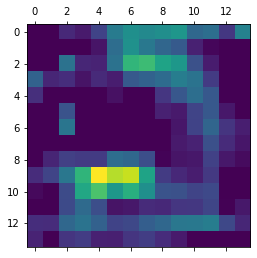

In [ ]:
heatmap = np.maximum(heatmap, 0) # Normalize to [0, 1)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
# Superimpose the activation map with the original image
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255*heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


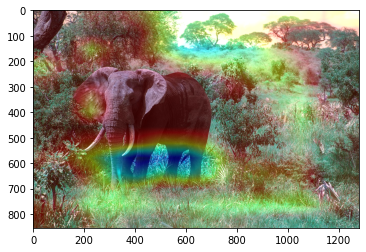

In [ ]:
plt.imshow(superimposed_img/255.)

### Method 4: Feature-based explanations

See [SHAP](https://shap.readthedocs.io/en/latest/index.html) and [LIME](https://github.com/marcotcr/lime) documentation for examples on how to apply these feature-based explanation tools to AI/ML models.

Some additional useful tutorials:
* [LIME: How to Interpret Machine Learning Models With Python](https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e)
* [Introduction to SHAP with Python](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
* [SHAP: Explain Any Machine Learning Model in Python](https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7)

# Chapter 6: Deep Learning for Text and Sequences

## Embeddings

Text can be vectorized in a number of ways:

Sparse, High-D Methods:
1. Segment text into words, then words into vectors
2. Segment text into characters, then characters into vectors
3. Extract n-grams (overlapping groups of consecutive words or characters), then into vectors.  This turns the sequence into a set and loses the sentence structure; good for shallow processing and not so much for deep learning.

Dense, Low-D Methods:
1. Word embeddings
> Can be learned like weights in a NN during training, or loaded from a different pre-trained embedding (akin to transfer learning).

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index

In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [ ]:
# You can hash these instead so you don't have to maintain an explicit word index.
# Usually done with lightweight hashing function - this will result in has collisions
# resulting in decreased accuracy, but can be worth the efficiency gain

dimensionality = 1000
max_len = 10

results = np.zeros((len(samples), max_len, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality # Hash word into index from [0-1000)
    results[i,j,index] = 1

In [ ]:
# An embedding layer is best understood as a dictionary that maps integer indices to dense vectors.
from keras.layers import Embedding

embedding_layer = Embedding(
    1000, # Max possible tokens
    64 # Dimensionality of embedding
    )

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20 # Just look at the first 20 words in a review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# If we just consider a "bag of words" embedding we can get ~76% on validation
# However, this ignores sentence structure which can lead to confusion
# e.g., 'movie is the bomb' vs. 'movie is a bomb'.
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_6 (Flatten)         (None, 160)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
19968/20000 [============================>.] - ETA: 0s - loss: 0.6692 - accuracy: 0.6267

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - 4s 201us/sample - loss: 0.6692 - accuracy: 0.6266 - val_loss: 0.6179 - val_accuracy: 0.6970
Epoch 2/10
20000/20000 [==============================] - 3s 134us/sample - loss: 0.5417 - accuracy: 0.7523 - val_loss: 0.5253 - val_accuracy: 0.7326
Epoch 3/10
20000/20000 [==============================] - 3s 148us/sample - loss: 0.4609 - accuracy: 0.7876 - val_loss: 0.4997 - val_accuracy: 0.7456
Epoch 4/10
20000/20000 [==============================] - 2s 110us/sample - loss: 0.4219 - accuracy: 0.8087 - val_loss: 0.4931 - val_accuracy: 0.7512
Epoch 5/10
20000/20000 [==============================] - 2s 89us/sample - loss: 0.3955 - accuracy: 0.8245 - val_loss: 0.4923 - val_accuracy: 0.7524
Epoch 6/10
20000/20000 [==============================] - 2s 89us/sample - loss: 0.3736 - accuracy: 0.8360 - val_loss: 0.4965 - val_accuracy: 0.7568
Epoch 7/10
20000/20000 [==============================] - 2s 92us/sample - loss: 0.3542 - accuracy: 0.8464 - val_

In [ ]:
# # Let's get the raw IMDB dataset and process that with a pre-trained embedding
# import zipfile
# imdb_dir = os.path.join(root_dir, 'imdb')

# with zipfile.ZipFile(os.path.join(root_dir, 'aclImdb.zip'), 'r') as zip_ref:
#     zip_ref.extractall(imdb_dir)

In [ ]:
train_dir = os.path.join(imdb_dir, 'aclImdb/train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), 'r')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # Look at first 100 words in review
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.'%len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.array(labels)
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples+validation_samples]
y_val = labels[training_samples: training_samples+validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of labels tensor: (25000,)


In [ ]:
# Download the pre-trained embedding
import urllib.request
url = 'https://nlp.stanford.edu/data/glove.6B.zip'
filename = os.path.join(root_dir, 'glove.6B')
urllib.request.urlretrieve(url, filename)

import zipfile
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(root_dir)

In [ ]:
embeddings_index = {}
f = open(os.path.join(root_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load and freeze the embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(x_train, y_train, epochs=10, batch_size=12, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
144/200 [====================>.........] - ETA: 0s - loss: 1.0973 - accuracy: 0.5208

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


200/200 [==============================] - 1s 7ms/sample - loss: 0.9832 - accuracy: 0.5400 - val_loss: 0.8324 - val_accuracy: 0.5052
Epoch 2/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.4573 - accuracy: 0.8200 - val_loss: 0.8139 - val_accuracy: 0.5269
Epoch 3/10
200/200 [==============================] - 1s 6ms/sample - loss: 0.3293 - accuracy: 0.8500 - val_loss: 1.3688 - val_accuracy: 0.5029
Epoch 4/10
200/200 [==============================] - 1s 6ms/sample - loss: 0.1748 - accuracy: 0.9400 - val_loss: 2.6665 - val_accuracy: 0.5035
Epoch 5/10
200/200 [==============================] - 1s 6ms/sample - loss: 0.2250 - accuracy: 0.9000 - val_loss: 0.7226 - val_accuracy: 0.5819
Epoch 6/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0837 - accuracy: 0.9800 - val_loss: 0.8112 - val_accuracy: 0.5815
Epoch 7/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.7934 - val_accuracy: 0.5763
Epo

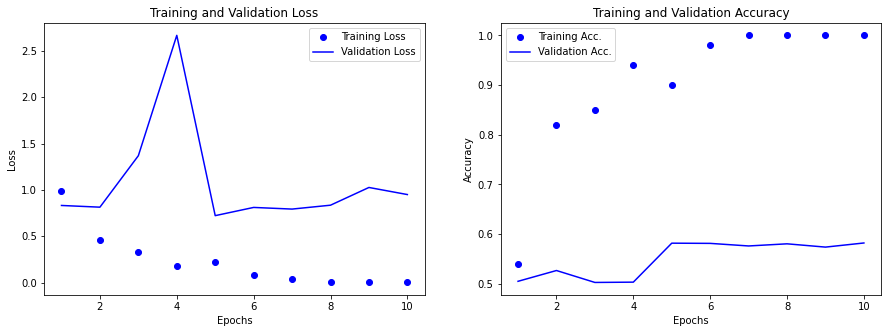

In [ ]:
plot_history(history)

## Recurrent NN

### SimpleRNN

RNN process an input in a loop, feeding its output back to itself several times.  This way it has some "memory." In pseudocode:

```
state_t = 0
successive_outputs = []
for input_t in input_sequence:
  output_t = f(input_t, state_t)
  successive_outputs.append(output_t)
  state_t = output_t
final_output = np.concatent(successive_outputs, axis=0)
```

where `f` is the "step function"
```
f = activation(dot(W, input_t) + dot(U, state_t) + bias)
```
and U, and W are some matrices like in a dense NN

The output is a tensor of (timesteps, output_features).  The value at row `i` contains information from all steps up to `i`, so **often you can just use the last value.**

In summary, a RNN is a `for` loops that reuses quantities from its last iteration of the loop (like recursion).

SimpleRNN are not very good for long sequences - LSTM and GRU (next) are better for those applications.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(
    32,
    return_sequences=True # This uses all successive iterations (above) - False uses only the final output
    ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# When stacking multiple RNN in a row, you need to set return_sequences=True

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Loading data...
17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.7010

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - 40s 2ms/sample - loss: 0.5617 - accuracy: 0.7010 - val_loss: 0.6124 - val_accuracy: 0.7010
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.3665 - accuracy: 0.8543 - val_loss: 0.4229 - val_accuracy: 0.8226
Epoch 3/10
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.2770 - accuracy: 0.8959 - val_loss: 0.3157 - val_accuracy: 0.8768
Epoch 4/10
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.2207 - accuracy: 0.9172 - val_loss: 0.4323 - val_accuracy: 0.7962
Epoch 5/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.1825 - accuracy: 0.9306 - val_loss: 0.4808 - val_accuracy: 0.8248
Epoch 6/10
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.1563 - accuracy: 0.9476 - val_loss: 0.3688 - val_accuracy: 0.8702
Epoch 7/10
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.1051 - accuracy: 0.9641 - val_loss

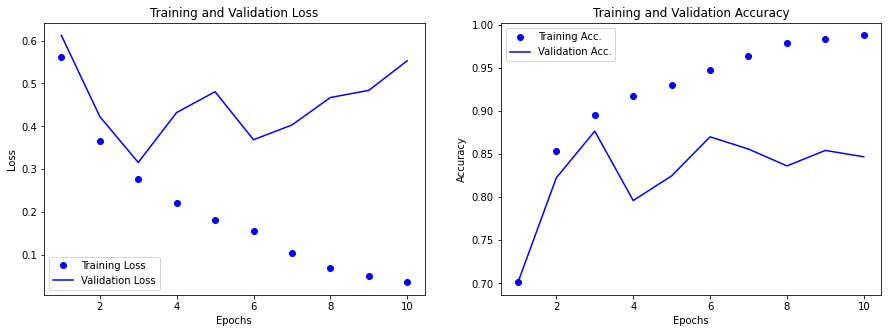

In [ ]:
plot_history(history)

### LSTM & GRU Layers

The issue of vanishing gradients prevents SimpleRNN from practically being able to learn long-term trends/memory.

LSTM = "long short term memory"

This basically adds a "carry track" to the RNN allowing information to "skip ahead" to a later timestep intact.

Now:
```
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

c_t = i_t + k_t + f_t # New carry track state
```

This may seem somewhat arbitary, but that is fine.  These weihts are learned by the network so it is not your job to understand them.  The point is that LSTM layers allow past information to propagate, thus fighting the vanishing gradient problem.

A GRU layer = "gated recurrent unit" is cheaper, faster to train version of an LSTM with possibly a bit less representational power.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - ETA: 0s - loss: 0.5190 - accuracy: 0.7498

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - 65s 3ms/sample - loss: 0.5190 - accuracy: 0.7498 - val_loss: 0.3895 - val_accuracy: 0.8372
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/sample - loss: 0.2971 - accuracy: 0.8826 - val_loss: 0.3464 - val_accuracy: 0.8564
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/sample - loss: 0.2361 - accuracy: 0.9114 - val_loss: 0.2991 - val_accuracy: 0.8880
Epoch 4/10
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.2005 - accuracy: 0.9280 - val_loss: 0.2965 - val_accuracy: 0.8834
Epoch 5/10
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.1824 - accuracy: 0.9331 - val_loss: 0.3371 - val_accuracy: 0.8804
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.1578 - accuracy: 0.9424 - val_loss: 0.6420 - val_accuracy: 0.7978
Epoch 7/10
20000/20000 [==============================] - 65s 3ms/sample - loss: 0.1445 - accuracy: 0.9488 - val_loss

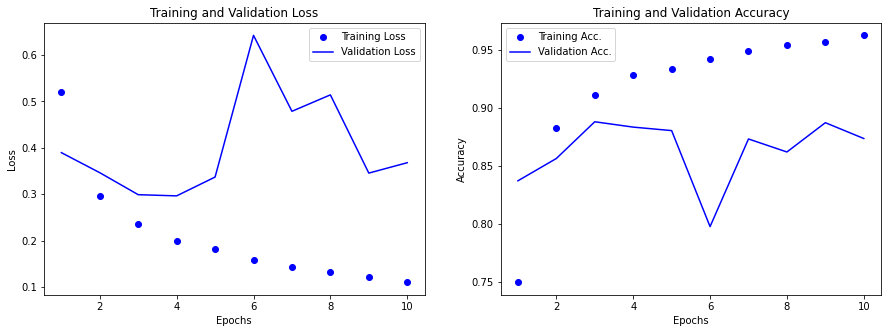

In [ ]:
plot_history(history)

### Advanced Use of RNN

There are 3 main tricks to improving the performance of RNNs.
1. Recurrent dropout; specific, built-in way to fight overfitting.
```code
layers.GRU(32,
droupout=0.2, # Temporally constant, applied at every timestep
recurrent_dropout=0.2 # Applied to recurrent activations
)
layers.LSTM(32,
droupout=0.2, # Temporally constant, applied at every timestep
recurrent_dropout=0.2 # Applied to recurrent activations
)
```
2. Stacking RNN layers; increasing representational power, at the cost of computational expense. You can also increase the size of each layer to increase the power.
```code
model = Sequential()
model.add(layers.GRU(32,
droupout=0.2,
recurrent_dropout=0.2,
return_sequences=True # All intermediate layers need to return their full sequences
)
model.add(layers.GRU(32,
droupout=0.2,
recurrent_dropout=0.2,
return_sequences=True # All intermediate layers need to return their full sequences
)
model.add(layers.GRU(32,
droupout=0.2,
recurrent_dropout=0.2,
)
model.add(layers.Dense(32, activation='sigmoid'))
model.compile(...)
```
3. Bidirectional recurrent layers; presents the same information to a RNN in different ways (forward and backward). Very popular for NLP applications.  Akin to the idea of ensembling because you are combining different "perspectives" on the data.
```
model = Sequential()
model.add(layers.Bidirectional(layers.LSTM(...)))
model.add(layers.Bidirectional(layers.GRU(...)))
```

Other advanced topics include:
recurrent attenion and sequence masking.

## Sequence Processing with Convnets

Time can be thought of another (spatial) dimension that has correlations so convnets can also be used to analyze correlated timeseries.

"Translation invariance" is now "temporal invariance".  This means they are not "order sensitive" so might be good for processing text sentiment, but maybe not so great for temperature forecasting.  For example, the temperature 2 hours ago might be less important than the temperature 1 hour ago; a convnet looks at all features inside the window equally, while a RNN does not.

Work on same principles as 2D Convnets, but because they are smaller you can usually afford larger convolution windows (e.g., 7-9 vs. 3-5).

Pooling and other operations are similarly analogous to their 2D counterparts.

These are faster and lighter than RNN, but are not sensitive to the order of the timesteps.  One strategy is to combime CNN as a preprocessing step before sending this to a RNN.  This is especially helpful for downsampling long sequences that can't be easily processed by a RNN.

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(input_train, maxlen=maxlen)
x_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Loading data...


In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - 88s 4ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_loss: 7.6168 - val_accuracy: 0.5062
Epoch 2/10
20000/20000 [==============================] - 83s 4ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_loss: 7.6168 - val_accuracy: 0.5062
Epoch 3/10
20000/20000 [==============================] - 84s 4ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_loss: 7.6168 - val_accuracy: 0.5062
Epoch 4/10
20000/20000 [==============================] - 83s 4ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_loss: 7.6168 - val_accuracy: 0.5062
Epoch 5/10
20000/20000 [==============================] - 102s 5ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_loss: 7.6168 - val_accuracy: 0.5062
Epoch 6/10
20000/20000 [==============================] - 136s 7ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_loss: 7.6168 - val_accuracy: 0.5062
Epoch 7/10
20000/20000 [==============================] - 86s 4ms/sample - loss: 7.7364 - accuracy: 0.4985 - val_lo

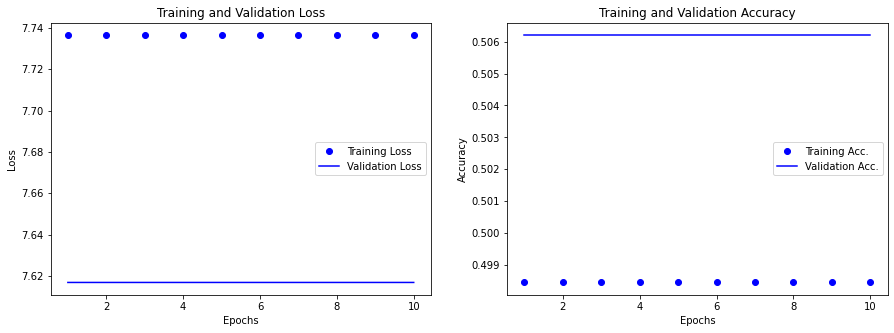

In [ ]:
plot_history(history)

In [ ]:
# Let's combine this with a RNN
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_8 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                     

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20000/20000 [==============================] - 121s 6ms/sample - loss: 0.6588 - accuracy: 0.6995 - val_loss: 0.4470 - val_accuracy: 0.8056
Epoch 2/10
20000/20000 [==============================] - 105s 5ms/sample - loss: 0.4161 - accuracy: 0.8565 - val_loss: 0.4053 - val_accuracy: 0.8472
Epoch 3/10
20000/20000 [==============================] - 107s 5ms/sample - loss: 0.3547 - accuracy: 0.8991 - val_loss: 0.3855 - val_accuracy: 0.8578
Epoch 4/10
20000/20000 [==============================] - 108s 5ms/sample - loss: 0.2857 - accuracy: 0.9286 - val_loss: 0.5508 - val_accuracy: 0.8760
Epoch 5/10
20000/20000 [==============================] - 106s 5ms/sample - loss: 0.2221 - accuracy: 0.9517 - val_loss: 0.6824 - val_accuracy: 0.8554
Epoch 6/10
20000/20000 [==============================] - 106s 5ms/sample - loss: 0.1286 - accuracy: 0.9769 - val_loss: 0.6887 - val_accuracy: 0.8700
Epoch 7/10
20000/20000 [==============================] - 104s 5ms/sample - loss: 0.0990 - accuracy: 0.9852 - v

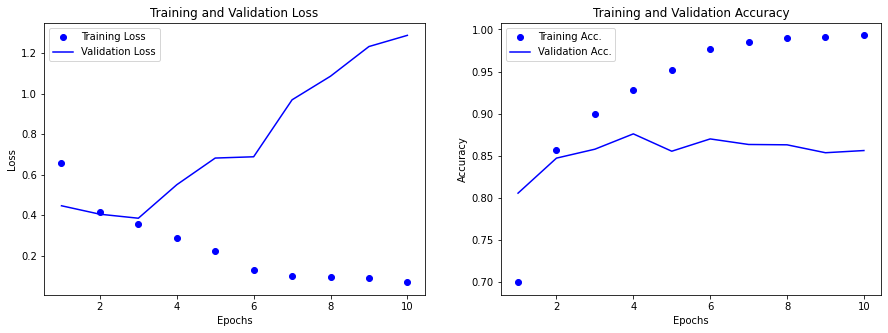

In [ ]:
plot_history(history)

# Chapter 7: Advanced Deep Learning Best Practices

The Keras Functional API lets you build graph-like models and use Keras models like python functions (hence the name "functional api").  Callbacks and TensorBoard help you monitor the training and visualize the results.

In the functional API you directly manipulate tensors and use layers as functions that take and return tensors.

## The Functional API

In [ ]:
from keras import Input, layers
from keras.models import Sequential, Model

In [ ]:
# In the higher-level API, the Sequential model looks like this
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Here is the same model in the functional API
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


The compile() and other functions are the same once the model is defined.

## Multi-Input Models

In [ ]:
# Let's create a model that answers a question with a single word from a fixed vocabulary.
# The inputs are the reference text (which provides the information) and the
# question itself.

from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

# The first input is the reference text / snippet
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(64, text_vocabulary_size)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

# The second input in the question itself
question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

# Now combine (merge) the two inputs
concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

# Add a Dense layer to process the newly merged data and answer with a single word
answer = layer.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

# Functional API specifies the input and the output tensors
model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training can be done in 2 ways.
import numpy as np

num_samples = 1000
max_length = 100

some_random_text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
some_random_questions = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
answers = np.random.randint(0, 1, size=(num_samples, answer_vocabulary_size))

# 1. Provide a list of numpy arrays as input
model.fit([some_random_text, some_random_questions], answers, epochs=10, batch_size=128)

# 2. Use dictionaries to map inputs - this only works if you name the inputs
model.fit({'text': some_random_text, 'question': some_random_questions}, answers, epochs=10, batch_size=128)

## Multiple Output Models (multiple heads)

In [ ]:
# In this example, some text in taken in from social meadia post(s) and the age, gender, and income level are predicted.

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)

x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D(5)(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

In [ ]:
# To train the model, you will need to combine the losses from each objective into a single value that is minimized.
# There are 2 ways to do this.

# 1. Provide a list
model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
              loss_weights=[0.25, 1.0, 10.0]
              )

# 2. Provide a dictionary (assuming you labeled the predictions accordingly)
model.compile(optimizer='rmsprop',
              loss={'age': 'mse', 'income': 'categorical_crossentropy', 'gender':'binary_cross_entropy'}
              loss_weights={'age': 0.25, 'income': 1.0, 'gender': 10.0}
              )

# Note that different loss functions are typically on different scales (e.g., MSE ~ 3-5 vs. cross-entropy ~ 0.1) so
# weights can be assigned to balance them out so one is not preferentially optimized over the other(s).

In [ ]:
# Fitting adopts a similar API
model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64)

model.fit(posts, {'age': age_targets, 'income': income_targets, 'gender': gender_targets}, epochs=10, batch_size=64)

## Directed Acylic Graphs

These must be acyclic - cycles are only allowed as part of recurrent NNs.

* Inception modules are inspired by the network-in-network architecture, and consist of a stack of modules that look like independent networks, split into several parallel branches. The simplest are 3-4 branches, each starting with a 1x1 convolution, then 3x3, etc. with a final concatenation of all branches.

> 1x1 convolutions are equivalent to running each tile through a dense layer; it mixes together information from the input channels, but doesn't mix information across space.

[![](http://img.youtube.com/vi/qVP574skyuM/0.jpg)](https://www.youtube.com/watch?v=qVP574skyuM)

[![](http://img.youtube.com/vi/C86ZXvgpejM/0.jpg)](https://www.youtube.com/watch?v=C86ZXvgpejM)

[![](http://img.youtube.com/vi/KfV8CJh7hE0/0.jpg)](https://www.youtube.com/watch?v=KfV8CJh7hE0)

* Residual connections tackle the issues of (1) vanishing gradients and (2) representational bottlenecks. In general, adding residual connections to any model with more than 10 layers is likely to be beneficial.  They work by adding the output of one layer to the activation output of another layer later on creating a shortcut.  This is similar to (but distinct from)
how [U-NET](https://developers.arcgis.com/python/guide/how-unet-works/) works.

> Normally, Sequential() models only have access to the last layer, so if the last layer is too small and loses some data, it is lost forever in the network.  Residual connections help preserve information for longer.

> By propagating information deeper (arbitrarily) into the layers of a network, you also help reduce the issues associated with vanishing gradients.

### Inception Modules

In [ ]:
from keras.applications.inception_v3 import InceptionV3
inc = InceptionV3(include_top=True, weights='imagenet')

?InceptionV3

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
inc.summary()

In [ ]:
# Here is a simple example

x = Input(shape=(None,), dtype='int32')

branch_a = layers.Conv2D(128, 1, activation='relu', strides=2)(x)

branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

### Residual Connections

Residual connections are "skip" connections that bypass blocks in the network.  They arose as a solution to a problem noticed when training deeper and deeper networks - deeper nets could not be trained as well as shallower ones.  Intuitively, if you had a good network with N layers, then you should be able to train one with e.g., N+5, as well or better since the additional layers should be able to learn the identity function; however, the deeper networks were always worse in practice.  This is attributed to the rough loss landscape and the fact that learning the identity function is actually hard.  What is NOT hard is learning a "zero" function - since weights are often initialized close to zero, a layer can much more easily learn to zero these out (approximately).  As a result, by adding a skip connection, the new transformation is a sum of what the network had so far plus a modification.  The network can easily learn this modification (residual) is zero, so adding more layers no longer makes it harder / worse.  This is a nice YouTube video on ths subject:

[![Deep Residual Learning for Image Recognition (Paper Explained)](http://img.youtube.com/vi/GWt6Fu05voI/0.jpg)](https://www.youtube.com/watch?v=GWt6Fu05voI&list=WL&index=16)

* [fast.ai lesson](https://course.fast.ai/Lessons/lesson18.html)

In [ ]:
# Here is an example when the you have a residual interaction when the feature maps between the two points being connected are the same.
x = ...
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)

y = layers.add([y, x])

In [ ]:
# Here is an example that uses
x = ...
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2, strides=2)(y) # This cuts the size of the output in half relative to x

residual = layers.Conv2D(128, 1, strides=2, padding='same')(x) # Use this to downsample (via strides) to half the original size

y = layers.add([y, residual]) # This way, we can add them together

Residual connections are similar to the idea of "wide and deep" networks.  These essentially connect all, or part, of the input to the output layer (See "Hands on Machine Learning with Scikit-Learn, Keras, and Tensorflow" book).  The idea is that this allows the network to learn "deep features" but also "shortcuts" or heuristics that improve the model performance.

[![](http://img.youtube.com/vi/zChFQCtrSrY/0.jpg)](https://www.youtube.com/watch?v=zChFQCtrSrY&list=WL&index=1)

## Layer Weight Sharing

In [ ]:
# You can re-use a layer (uses the same weights)

lstm = layers.LSTM(32)

left_input = Input(shape=(None, 128)) # Input is variable length sequence of vectors of length 128
left_output = lstm(left_input)

right_input = Input(shape=(None, 128))
right_output = lstm(right_input) # Re-use the weights

merged = layers.concatenate([left_output, right_output], axis=-1)
predictions = layers.Dense(1, activation='sigmoid')(merged)

model = Model([left_input, right_input], predictions)
model.fit([left_data, right_data], targets)


## Callbacks

Useful for:
* model checkpointing
* early stopping
* dynamically adjusting the value of parameters (such as learning rate) on the fully
* logging validation metrics and visualizing the progress of the training

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, CSVLogger # Not exhaustive list

In [ ]:
# This is how you use callbacks

callbacks_list = [
  EarlyStopping(
      monitor='accuracy',
      patience=1 # interrupt training when accuracy has stopped improving for more than 1 epoch (that is, two epochs)
      ),
  ModelCheckpoint( # Saves weights after every epoch
      filepath='my_model.h5',
      monitor='validation_loss',
      save_best_only=True # Only overwrite if the new model is the best found so far
  )
  ReduceLROnPlateau( # Effective strategy to get out of local minima
      monitor='validation_loss',
      factor=0.1, # Reduce LR by factor of 10 when triggered
      pateince=10 # Triggers after val_loss has stopped improving for 10 epochs
  )
]

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x, y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=[x_val, y_val])

In [ ]:
# A custom callback function

class ActivationLogger(keras.callbacks.Callback):
  """
  The callback has access to:
  self.model (model instance which calls this callback)
  self.validation_data (from model.fit())

  Also, all on_* members are called with a logs argument
  which is a dictionary of info about previsou batch, epoch , or training run,
  metrics, etc.
  """
  def set_model(self, model):
    self.model = model
    layer_outputs = [layer.output for layer in model.layers]
    self.activations_model = keras.models.Model(model.input, layer_outputs) # Returns the output of each layer in this model

  def on_epoch_begin(self, epoch, logs=None): # Called at the start of every epoch
    if self.validation_data is None:
      raise RuntimeError('Requires validation data')

  def on_epoch_end(self, epoch, logs=None): # Called at the end of every epoch
    if self.validation_data is None:
      raise RuntimeError('Requires validation data')

  def on_batch_begin(self, epoch, logs=None): # Called right before processing each batch
    if self.validation_data is None:
      raise RuntimeError('Requires validation data')

  def on_batch_end(self, epoch, logs=None): # Called right after processing each batch
    if self.validation_data is None:
      raise RuntimeError('Requires validation data')

  def on_train_begin(self, epoch, logs=None): # Called at start of training
    if self.validation_data is None:
      raise RuntimeError('Requires validation data')

  def on_train_end(self, epoch, logs=None): # Called at end of training
    if self.validation_data is None:
      raise RuntimeError('Requires validation data')

## TensorBoard

This is only available when using TensorFlow backend for Keras.

The main purpose is to visually monitor what is going on inside your model during training.

In [ ]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d_5 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Create directory for log files
# !mkdir my_log_dir

callbacks = [
             keras.callbacks.TensorBoard(log_dir=os.path.join(root_dir, 'my_log_dir'),
                                         histogram_freq=1)
]

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.4539 - accuracy: 0.8464 - val_loss: 0.4156 - val_accuracy: 0.8608
Epoch 2/20
20000/20000 [==============================] - 37s 2ms/sample - loss: 0.3803 - accuracy: 0.8792 - val_loss: 0.6783 - val_accuracy: 0.8210
Epoch 3/20
20000/20000 [==============================] - 39s 2ms/sample - loss: 0.3221 - accuracy: 0.9027 - val_loss: 0.5658 - val_accuracy: 0.8472
Epoch 4/20
20000/20000 [==============================] - 48s 2ms/sample - loss: 0.2962 - accuracy: 0.9161 - val_loss: 0.5904 - val_accuracy: 0.8596
Epoch 5/20
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.2525 - accuracy: 0.9384 - val_loss: 0.7580 - val_accuracy: 0.8470
Epoch 6/20
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.2110 - accuracy: 0.9526 - val_loss: 0.6717 - val_accuracy: 0.8710
Epoch 7/20
20000/20000 [==============================] -

In [ ]:
# Run the command below from the command line and go to http://localhost:6006 in your browser
# !tensorboard --logdir=my_log_dir

# You can use the tensorbaord magics as an alternative.
# If you are running this on binder, or locally, you should be able access these log files

# If you are running on colab you will need to save these results to your google drive and point tensorboard at it
# https://medium.com/codex/embed-tensorboard-into-your-google-colab-window-when-using-google-drive-with-2-lines-of-code-a3e3320d9386

# %load_ext tensorboard
%tensorboard --logdir='/gdrive/MyDrive/Mayan EDMS/Research/Machine Learning/Colab Notebook Examples/my_log_dir/'

# You can also upload these results and make them **PUBLICLY** available with the tensorboard.dev service
# https://medium.com/@today.rafi/tensorboard-in-google-colab-bd49fa554f9b
# !tensorboard dev upload --logdir my_log_dir --name "My first deep learning experiment" --description "My first example"

## Advanced Architecture Patterns

1: Residual connections
---
See last section



2: Batch (re-)Normalization
--
> Useful in many architectures, especially deep convnets.  Normalization (standardization -> mean=0, std=1) is commonly used and easy to do as the initial input to a model, but should be a concern after EVERY transformation (layer) in the network.  There is a layers.BatchNormalization() available in Keras which maintains a moving average of batches over time to normalize the data as training proceeds.  This mainly helps with gradient propagation and is used liberally in advanced convnets.
> ```python
conv_model.add(layers.Dense(32, 3, activation='relu'))
conv_model.add(layers.BatchNormalization())
```
[![](http://img.youtube.com/vi/tNIpEZLv_eg/0.jpg)](https://www.youtube.com/watch?v=tNIpEZLv_eg)
[![](http://img.youtube.com/vi/nUUqwaxLnWs/0.jpg)](https://www.youtube.com/watch?v=nUUqwaxLnWs)


3: Depthwise separable convolution
---
These are drop-in replacements for 2D convolution layers that make the model (1) lighter, (2) faster to train, and (3) usually perform better.  They perform spatial convolution on each channel separately, then concatenate the results and perform a 1x1 (pointwise) convolution on the result.

> `layers.Conv2D(...)` $\rightarrow$ `layers.SeparableConv2D(...)`

[![](http://img.youtube.com/vi/T7o3xvJLuHk/0.jpg)](https://www.youtube.com/watch?v=T7o3xvJLuHk)

4: Hyperparameter optimization
---
See some examples:
* [hyperopt](http://hyperopt.github.io/hyperopt/)
* [hyperas](https://github.com/maxpumperla/hyperas)

Keras now comes with some built-in hyperparameter tuning; see the documentation on [KerasTuner](https://keras.io/keras_tuner/).

5: Model ensembling
---
Models that are diverse and high-performing, see different things and are correct for different reasons.  Combining or averaging these results outperforms any individual model.  Best practice is to learn weights for a weighted average of different models.

# Chapter 8: Generative Deep Learning

## Text Generation with LSTM

The universal way to generate sequence data in deep learning is to train a network (usually a RNN or convnet) to predict the next token(s) in a sequence using the last few token(s) as input.

* tokens = words or characters
* langauge model = any model that predicts probability of the next token
* a language model captures the latent space (statistical structure) of the language

Sampling from the latent space can be done in a greedy way (choose the most likely character to put next) or in a stochastic way (introduce some randomness by sampling according the learned distribution).  The amount of randomness is controlled by the "temperature".

In [ ]:
import numpy as np

def reweight_distribution(original_distribution, temperature=0.5):
  distribution = np.log(original_distribution) / temperature
  distribution = np.exp(distribution)
  return distribution / np.sum(distribution) # P_new ~ P_old^(-1/T)

In [ ]:
a = np.array([1, 2, 3, 4, 5], dtype=np.float32)
a = a / np.sum(a)
print(a)

[0.06666667 0.13333334 0.2        0.26666668 0.33333334]


In [ ]:
# Lower T is more deterministic (i.e., greedy selection of most likely)
reweight_distribution(a, 0.1)

array([9.1960203e-08, 9.4167168e-05, 5.4301545e-03, 9.6427262e-02,
       8.9804828e-01], dtype=float32)

In [ ]:
# Higher T is less deterministic (i.e., more random)
reweight_distribution(a, 10.0)

array([0.18144824, 0.19447142, 0.20251855, 0.20842928, 0.21313255],
      dtype=float32)

In [ ]:
# 1. Obtain a corpus to train on
import keras
import tensorflow as tf
import numpy as np

path = tf.keras.utils.get_file('nietzsche.txt', origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length: ', len(text))

614400/600901 [==============================] - 1s 2us/step
Corpus length:  600893


In [ ]:
# 2. Vectorize
maxlen = 60 # Work with sequences of 60 characters
step = 3 # Sample a new sequence every 3 characters
sentences = []
next_chars = []

for i in range(0, len(text)-maxlen, step):
  sentences.append(text[i:i+maxlen])
  next_chars.append(text[i+maxlen])

chars = sorted(list(set(text)))
print('Unique chars: ', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorizing...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool) # OHE
y = np.zeros((len(sentences), len(chars)), dtype=bool) # OHE
for i, sentence in enumerate(sentences):
  for t, char in enumerate(sentence):
    x[i, t, char_indices[char]] = 1
  y[i, char_indices[next_chars[i]]] = 1

Unique chars:  57
Vectorizing...


KeyboardInterrupt: ignored

In [ ]:
# 3. Build model
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(
    optimizer=keras.optimizers.rmsprop_v2.RMSProp(learning_rate=0.01),
    loss='categorical_crossentropy', # Because we have OHE inputs
    )

In [ ]:
# 4. Function to sample the next character
def sample(preds, temp=1.0):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temp
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

In [ ]:
# 5. Text-generation loop
import random
import sys

for epoch in range(1, 60):
  print('epoch ', epoch)
  model.fit(x, y, batch_size=128, epochs=1) # Fit the model for 1 iteration
  start_index = random.randint(0, len(text)-maxlen-1)
  generated_text = text[start_index: start_index+maxlen] # Select a text seed at random

  # At certain epochs, generate some text.  At later epochs this model will have
  # converged and the output will seem more sensical.
  if epoch%10 == 0:
    print('--- Generating with seed: "'+generated_text+'"')
    for temp in [0.2, 0.5, 1.0, 1.2]:
      print('\n------ temperature:', temp)
      sys.stdout.write(generated_text)

      for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
          sampled[0, t, char_indices[char]] = 1

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temp)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)

## DeepDream

This is an artistic image modification technique that uses the representations learned by CNNs, first released by Google in 2015.  The algorithm is similar to the filter visualization used previously which employs gradient ascent to maximize the activation of a specific filter.  In this case, you start from a known image (not random noise) and run the optimization which modifies the image in "artistic" ways, and a few other modifications. Basically, this is running a convnet in reverse.

In [ ]:
from keras.applications import inception_v3
from keras import backend as K

K.set_learning_phase(0) # Disables all training-specific operations

model = inception_v3.InceptionV3(weights='imagenet', include_top=False)
# model.summary()

# We are going to maximize the L2 norm of the weighted sum of activations from different layers, instead of just one
# Lower layers produce geometric patterns; higher layers produce recognizable visuals from ImageNet

# Define loss
# You can adjust the layer_contributions to get different results!
layer_contributions = {'mixed2':0.2, 'mixed3': 2., 'mixed4': 0.5, 'mixed5': 1.0}

layer_dict = dict([(layer.name, layer) for layer in model.layers])
loss = K.variable(0.) # Initialize loss to 0.0
for layer_name in layer_contributions:
  coeff = layer_contributions[layer_name]
  activation = layer_dict[layer_name].output
  scaling = K.prod(K.cast(K.shape(activation), 'float32')) # L2 norm
  loss = loss + coeff * K.sum(K.square(activation[:, 2:-2, 2:-2, :])) / scaling # 2:-2 is to avoid border artifacts in the image


In [ ]:
# Gradient ascent
dream = model.input
grads = K.gradients(loss, dream)[0] # Gradient of dream wrt loss
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7) # Normalizes the gradients (important trick)
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

def eval_loss_and_grads(x):
  outs = fetch_loss_and_grads([x])
  loss_value, grad_values = outs[0], outs[1]
  return loss_value, grad_values

def gradient_ascent(x, iterations, step, max_loss=None):
  for i in range(iterations):
    loss_value, grad_values = eval_loss_and_grads(x)
    if max_loss is not None and loss_value > max_loss: # We are running gradient ASCENT
      break
    print('...Loss value at', i, ':', loss_value)
    x += step*grad_values
  return x

# Some support functions for the algorithm below
import scipy
import imageio
from keras.preprocessing import image

def resize_img(img, size):
  img = np.copy(img)
  factors = (1,
             float(size[0]) / img.shape[1],
             float(size[1]) / img.shape[2],
             1)
  return scipy.ndimage.zoom(img, factors, order=1)

def preprocess_image(image_path):
  img = image.load_img(image_path)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = inception_v3.preprocess_input(img)
  return img

def deprocess_image(x):
  if K.image_data_format() == 'channels_first':
    x = x.reshape((3, x.shape[2], x.shape[3]))
    x = x.transpose((1, 2, 0))
  else:
    x = x.reshape((x.shape[1], x.shape[2], 3))
  x /= 2.0
  x += 0.5
  x *= 255.
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def save_img(img, fname):
  pil_img = deprocess_image(np.copy(img))
  imageio.imwrite(fname, pil_img)

# The algorithm
# First, define scales (called octaves) over which to process the images.
# You start by processing small images and work your way up.
# You essentially dream, upscale, inject detail, dream again, upscale again, ...
# The detail re-injection is to ending up with a blurry image (low resolution) at the end.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

step = 0.01
num_octave = 5
octave_scale = 1.4
iterations = 20

max_loss = 10.

base_image_path = os.path.join(root_dir, 'African_bush_elephant_Image02.jpg')

img = preprocess_image(base_image_path)
original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
  shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
  successive_shapes.append(shape)
successive_shapes[::-1] # Reorder from smallest to largest

# Shrink the original down to smallest scale - we will end up with an image the same as what we start with
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for octave_, shape in enumerate(successive_shapes):
  print('Processing image shape', shape)
  img = resize_img(img, shape)
  img = gradient_ascent(img, iterations=iterations, step=step, max_loss=max_loss)
  upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
  same_size_original = resize_img(original_img, shape)
  lost_detail = same_size_original - upscaled_shrunk_original_img

  img = img + lost_detail
  shrunk_original_img = resize_img(original_img, shape)

  fname = os.path.join(root_dir, 'dream_at_scale_'+str(octave_)+'.png')
  save_img(img, fname=fname)
  plt.imshow(imageio.imread(fname))
  plt.show()

fname = os.path.join(root_dir, 'final_dream.png')
save_img(img, fname)
plt.imshow(imageio.imread(fname))

## Neural Style Transfer

The idea is to apply the style of a reference image to a target image while conserving the content of the original target image. "Style" means textures, colors, and visual patterns vs. "content" which is the higher-level macrostructure of the image.  In pseudocode this is:

loss = distance(style(ref_img) - style(gen_img)) + distance(content(original_img) - content(gen_img)).

The keys is that deep convnets now offer a mathematical way to quantify "style" and "content" enabling you to minimize this loss.

There are many iterations of this algorithm (refinements), but here is the original from 2015.

* "Content" is more "global" so a good candidate for the loss function would be the L2 norm between the activations an upper layer in the pretrained convnet computed over the target image and the generated image.

* "Style" is more local and uses lower layers instead.  The original implementation used a Gram matrix (inner product of the feature maps) of a chosen layers' activations. This captures a map of correlations between a layer's features which empirically correspond to texture.

Procedure:
1. Set up network that computes VGG19 (or other) layer activations for a style-reference image, the target image, and generated image at the same time.
2. Use layer activations computed over these images to compute the loss function described above.
3. Use gradient descent to perform minimization.

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
target_image_path = os.path.join(root_dir, 'African_bush_elephant_Image02.jpg')
style_reference_image_path = os.path.join(root_dir, 'starry_night.jpg')

width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)

import numpy as np
from keras.applications import vgg19

def preprocess_image(image_path):
  img = load_img(image_path, target_size=(img_height, img_width))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = vgg19.preprocess_input(img)
  return img

def deprocess_image(x):
  # undo vgg19 preprocess_input()
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1] # Converts BGR to RGB (specific weirdness from vgg19)
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
from keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))
combination_image = K.placeholder((1, img_height, img_width, 3))

input_tensor = K.concatenate([target_image, style_reference_image, combination_image], axis=0)
model = vgg19.VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)

In [ ]:
def content_loss(base, combination):
  return K.sum(K.square(combination - base))

def gram_matrix(x):
  features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
  gram = K.dot(features, K.transpose(features))
  return gram

def style_loss(style, combination):
  S = gram_matrix(style)
  C = gram_matrix(combination)
  channels = 3
  size = img_height * img_width
  return K.sum(K.square(S-C)) / (4. * (channels**2) * (size**2))

def total_variational_loss(x): # Basically regularization to encourage continuity in the image (image processing magic)
  a = K.square(
      x[:, :img_height-1, :img_width-1, :] -
      x[:, 1:, :img_width-1, :]
  )
  b = K.square(
      x[:, :img_height-1, :img_width-1, :] -
      x[:, :img_height-1, 1:, :]
  )
  return K.sum(K.pow(a+b, 1.25))

In [ ]:
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
content_layer = 'block5_conv2'
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1'
                ]

# You can adjust these weights to get different results!
total_variational_weight = 1e-4
style_weight = 1.
content_weight = 0.025

In [ ]:
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss = loss + content_weight * content_loss(target_image_features, combination_features)

for layer_name in style_layers:
  layer_features = outputs_dict[layer_name]
  style_reference_features = layer_features[1, :, :, :]
  combination_features = layer_features[2, :, :, :]
  sl = style_loss(style_reference_features, combination_features)
  loss = loss + (style_weight / len(style_layers)) * sl

loss = loss + total_variational_weight * total_variational_loss(combination_image)

In [ ]:
grads = K.gradients(loss, combination_image)[0]

fetch_loss_and_grads = K.function([combination_image], [loss, grads])

# The original algorithm used L-BFGS to optimize so we will do the same;
# this wrapper is just for efficiency since that routine needs separate
# inputs for the loss and grads and it would be inefficient to compute
# them twice.
class Evaluator(object):
  def __init__(self):
    self.loss_value = None
    self.grads_value = None

  def loss(self, x):
    assert(self.loss_value is None)
    x = x.reshape((1, img_height, img_width, 3))
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1].flatten().astype('float64')
    self.loss_value = loss_value
    self.grad_values = grad_values
    return self.loss_value

  def grads(self, x):
    assert(self.loss_value is not None)
    grad_values = np.copy(self.grad_values)
    self.loss_value = None
    self.grad_values = None
    return grad_values

In [ ]:
evaluator = Evaluator()

In [ ]:
# The style transfer loop

from scipy.optimize import fmin_l_bfgs_b
from imageio import imwrite
import time

result_prefix = os.path.join(root_dir, 'my_result')
iterations = 20

x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
  print('Start of iteration', i)
  start_time = time.time()
  x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x, fprime=evaluator.grads, maxfun=20)

  print('Current loss value:', min_val)
  img = x.copy().reshape((img_height, img_width, 3))
  img = deprocess_image(img)

  fname = result_prefix + '_at_iteration_%d.png'%i
  imwrite(fname, img)
  print('Image saved as', fname)
  end_time = time.time()
  print('Iteration %d completed in %ds'%(i, end_time - start_time))

## Variational Autoencoders

VAEs learn a latent space which has statistical structure allowing you to sample from it, then decode that sample to produce new results.

VAEs are great for learning well-structured latent spaces where specific directions encode a meaningful axis of variation in the data.  GANs (next section) can generate highly realistic results but their latent spaces have much less structure and continuity.

VAEs can use "concept vectors" - e.g., a vector for "smile" in an image.  You can then move along that vector to add more or less "smile".

Basic Structure:
1. Encoder module turns input samples into two parameters in a latent space of representations, z_mean and z_log_variance (assumes a normal latent space).
2. Randomly sample from the normal latent space, z = z_mean + exp(z_log_variance)*epsilon, where epsilons is a random tensor of small values.
3. Decode the point chosen.

This randomness forces points that are close in the latent space to decode into "similar" things (because that is what the decoder is trained on).  A **reconstruction loss** is used to force the decoded sampless to match the , inputs, while a **regularization loss** is used to help learn well-formed latent spaces (reduce overfitting).

Schematically, training looks like this:

```
z_mean, z_log_va = encoder(input)
z = z_mean + exp(z_log_var)*eps
reconstructed = decoder(z)
model = Model(input, reconstructed)
```

In [ ]:
# Here is a VAE for images using a convnet for the encoding and decoding.
# For non-image data, Dense layers or other networks would be better; the exact
# encoder and decoder that is most useful depends on the data.

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


latent_dim = 2

# Encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

In [ ]:
# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)

# Conv2DT to convert back to original input shape
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [ ]:
# Train
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

plot_latent_space(vae)

In [ ]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

In [ ]:
# Observe how there are continuous transformations from one digit to another!
# There are directions of "one-ness" and "four-ness", for example.
# The VAE latent space is highly structured!

## Generative Adversarial Networks

GANs are made of a generator network competing against a discriminator network. However, they do not have a lot of guarantees that VAEs do and, in particular, do not have continuous latent spaces.

GANs are hard to train because the loss surface is changing with ever iteration.

There a lot of tricks associated with training GANs which are heuristic and really requries a lot more detail/practice.  Here is a just a basic example of deep convolutional GAN.

The basic workflow is:
* Draw random points from an input vector (latent space)
* Generator (G) maps vector to an image (a fake)
* Discriminator (D) maps this image to a score (real vs. not); train this with real images from training set and fake ones just generated, then FIX the weights!
* Draw new random points from latent space
* GAN network chains D and G together, gan(x) = D(G(x))
* Train G using the gradients of its weights wrt to the loss of the GAN model; this means that at every step you move the weights of G in a direction that makes D mode likely to classify the images decoded by the generator (fake) as "real".

G never actually sees the "real" images directly!

[![](http://img.youtube.com/vi/eyxmSmjmNS0/0.jpg)](https://www.youtube.com/watch?v=eyxmSmjmNS0&list=WL&index=2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import gdown
from zipfile import ZipFile

In [ ]:
# We'll use face images from the CelebA dataset, resized to 64x64.
os.makedirs(os.path.join(root_dir, "celeba_gan"))

url = "https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684"
output = os.path.join(root_dir, "celeba_gan/data.zip")
gdown.download(url, output, quiet=True)

with ZipFile(os.path.join(root_dir, "celeba_gan/data.zip"), "r") as zipobj:
    zipobj.extractall(os.path.join(root_dir, "celeba_gan"))

In [ ]:
# Create a dataset from our folder, and rescale the images to the [0-1] range
dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(root_dir, "celeba_gan"), label_mode=None, image_size=(64, 64), batch_size=32
)
dataset = dataset.map(lambda x: x / 255.0)

In [ ]:
# Create discriminator to predict REAL vs. NOT REAL (binary task)
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"), # yes/no binary task
    ],
    name="discriminator",
)
discriminator.summary()


In [ ]:
# Create the generator; it mirrors the discriminator, replacing Conv2D layers with Conv2DTranspose layers.
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()


In [ ]:
# Override train_step - in this case, you train the generator, make
# example(s), train the discriminator, and use that feedback to update
# the generator so it is better at fooling the discriminator.

class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile(
            optimizer=keras.optimizers.adam_v2.Adam(), # Ignored, but Keras requires an optimizer input
            loss=keras.losses.BinaryCrossentropy() # Ignored, but Keras requires a loss input
        )
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }


In [ ]:
# A monitor to keep an eye on progress
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))

In [ ]:
# Train
epochs = 1  # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)